### Twitter sentiment Analysis

Dataset:

* Dataset contains 3 columns { ID, Sentiment, Tweet}

In [184]:
import pandas as pd
import matplotlib as plt
import seaborn as snsR
import re

In [185]:
df = pd.read_csv('LabeledText.csv')
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [186]:
df['LABEL'].replace({'positive':1, 'neutral':0, 'negative':-1}, inplace=True)
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,-1
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,-1
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,0
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1


In [187]:
df.drop(columns=['File Name'], inplace=True)
df.head()

,Caption,LABEL
0,How I feel today #legday #jelly #aching #gym,-1
1,@ArrivaTW absolute disgrace two carriages from...,-1
2,This is my Valentine's from 1 of my nephews. I...,1
3,betterfeelingfilms: RT via Instagram: First da...,0
4,Zoe's first love #Rattled @JohnnyHarper15,1


<AxesSubplot: xlabel='LABEL', ylabel='count'>

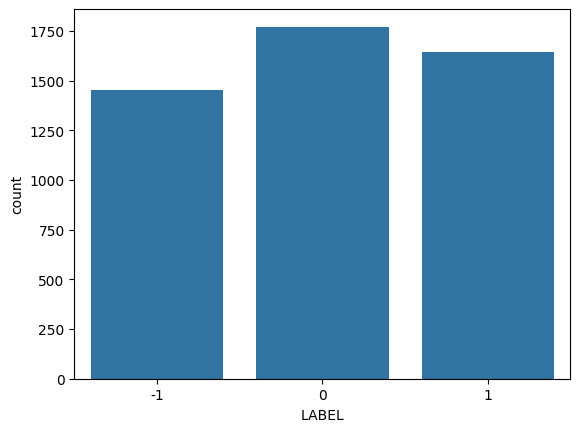

In [188]:
sns.countplot(x="LABEL",data=df)

In [189]:
# CLEANING

# Cleaning data
def remove(tweet):
  #remove mention
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
  
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'^rt[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'^https[\s]+', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'%', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  tweet = re.sub(r':', '', tweet)
  #remove space
  tweet = tweet.strip()
  #remove double space
  tweet = re.sub('\s+',' ',tweet)
  return tweet
  
df['cleaning_data'] = df['Caption'].apply(lambda x: remove(x.lower()))

In [190]:
df.drop_duplicates(subset ="cleaning_data", keep = 'first', inplace = True)

In [191]:
# STOPWORDS REMOVAL

#nltk.download('stopwords')
from nltk.corpus import stopwords

#clean stopwords
stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text
# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
df['tweet_sw'] = df['cleaning_data'].apply(clean_stopwords)

In [192]:
# STEMMING

from nltk.stem import PorterStemmer
ps = PorterStemmer()
def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text  
df['tweet_stem'] = df['tweet_sw'].apply(porterstemmer)

In [193]:
# LEMMATIZATION

import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatization (text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)
df['tweet_clean'] = df['tweet_stem'].apply(lemmatization)

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(df['tweet_clean'])
vector = vectorizer.transform(df['tweet_clean'])
print(vector)

  (0, 9503)	0.26932801938853884
  (0, 5374)	0.5102704272517807
  (0, 4913)	0.4865528118708129
  (0, 4068)	0.4222896651921494
  (0, 3316)	0.2889148716906935
  (0, 58)	0.41055146558378014
  (1, 10150)	0.25637011723345565
  (1, 8818)	0.2835363039821887
  (1, 7956)	0.2813817629345656
  (1, 4104)	0.29624015206948334
  (1, 2546)	0.5586549402585815
  (1, 1496)	0.36731185483929196
  (1, 736)	0.38521692307731364
  (1, 33)	0.302559389703172
  (2, 9915)	0.26469809837152386
  (2, 9385)	0.566785986563777
  (2, 8657)	0.35388367786964314
  (2, 6410)	0.3803928561771396
  (2, 5487)	0.2690074605113996
  (2, 3909)	0.23396918958542356
  (2, 2883)	0.3611858447238673
  (2, 951)	0.2849462576440194
  (3, 7993)	0.30091272282372533
  (3, 7300)	0.42214622354532905
  (3, 4726)	0.4448029761803711
  :	:
  (4515, 4815)	0.38521884779829685
  (4515, 2852)	0.38521884779829685
  (4515, 951)	0.2656325629600358
  (4515, 566)	0.34475585918310697
  (4516, 5551)	0.5824411750245548
  (4516, 2881)	0.8128728545326237
  (4517, 9

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [196]:
X = df['tweet_clean']
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2)


#### MODELS

In [197]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
model.score(X_test, y_test)

0.6449115044247787

In [199]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, random_state=25)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=25)

In [200]:
predictions = model.predict(X_test)

In [201]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("Accuracy Score Testing :")
print(accuracy_score(y_test, predictions))

print("Confusion Matrix : ")
print(confusion_matrix(y_test,predictions))

print("Classification Report : ")
print(classification_report(y_test,predictions))

Accuracy Score Testing :
0.661504424778761
Confusion Matrix : 
[[129 129  16]
 [ 42 269  26]
 [  9  84 200]]
Classification Report : 
              precision    recall  f1-score   support

          -1       0.72      0.47      0.57       274
           0       0.56      0.80      0.66       337
           1       0.83      0.68      0.75       293

    accuracy                           0.66       904
   macro avg       0.70      0.65      0.66       904
weighted avg       0.69      0.66      0.66       904

